# Question 1

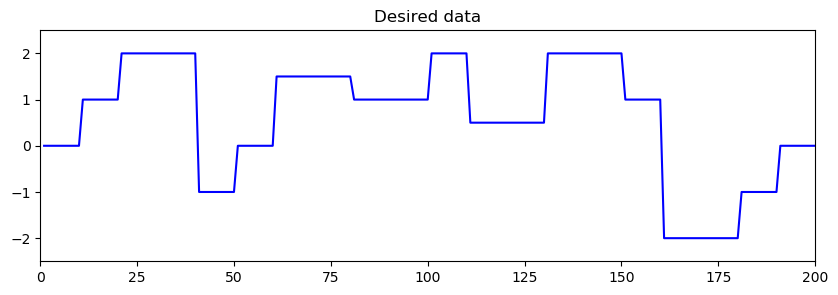

In [4]:
# Get data
using CSV

# import data set
raw = CSV.read("voltages.csv", datarow=1)

volt = raw[1:end,1]; # The "desired" signal
time = collect(1:1:length(volt));

using PyPlot
figure(figsize=(10,3))
plot(time,volt,"b-", markersize=10)
title("Desired data")
axis([0,200,-2.5,2.5]);

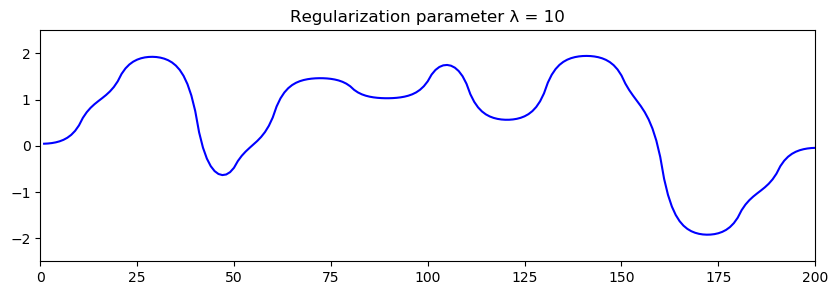

In [6]:
using JuMP, Gurobi

λ = 10

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, v[1:length(volt)])

@expression(m, mainObj, sum((v[i] - volt[i]).^2 for i in 1:length(volt)))
@expression(m, R, sum((v[i] - v[i - 1]).^2 for i in 2:length(volt)))

@objective(m, Min, mainObj + λ*R) # Minimize trade off

solve(m)

using PyPlot
figure(figsize=(10,3))
plot(time,getvalue(v),"b-", markersize=10)
title("Regularization parameter λ = 10")
axis([0,200,-2.5,2.5]);

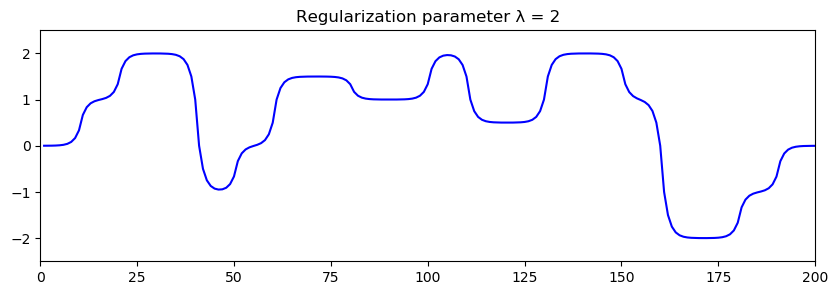

In [8]:
using JuMP, Gurobi

λ = 2

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, v[1:length(volt)])

@expression(m, mainObj, sum((v[i] - volt[i]).^2 for i in 1:length(volt)))
@expression(m, R, sum((v[i] - v[i - 1]).^2 for i in 2:length(volt)))

@objective(m, Min, mainObj + λ*R) # Minimize trade off

solve(m)

using PyPlot
figure(figsize=(10,3))
plot(time,getvalue(v),"b-", markersize=10)
title("Regularization parameter λ = 2")
axis([0,200,-2.5,2.5]);

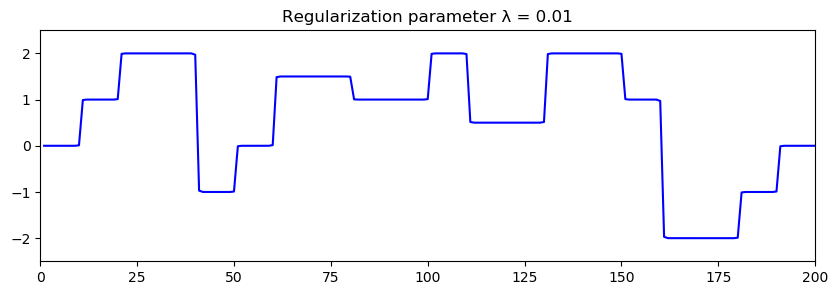

In [9]:
using JuMP, Gurobi

λ = 0.01

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, v[1:length(volt)])

@expression(m, mainObj, sum((v[i] - volt[i]).^2 for i in 1:length(volt)))
@expression(m, R, sum((v[i] - v[i - 1]).^2 for i in 2:length(volt)))

@objective(m, Min, mainObj + λ*R) # Minimize trade off

solve(m)

using PyPlot
figure(figsize=(10,3))
plot(time,getvalue(v),"b-", markersize=10)
title("Regularization parameter λ = 0.01")
axis([0,200,-2.5,2.5]);

We can conclude that, while λ is larger which means R(v) is smaller, we can get smoother voltage graph